#**Computer Vision Assignment 1**

    Amr Ayman Ibrahim Momtaz Ibrahim Momtaz    18011178
    Asmaa Ramadan Khamis                       18015029
    Mariam Ahmed Mohamed Ghazi                 18015032




##**Part 1**

### **Imports**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from google.colab import drive
from google.colab.patches import cv2_imshow

### **Image Cartoonifying**

In [ ]:
drive.mount('/content/drive')
img_src = '/content/drive/My Drive/ComputerVision/oldman.png'

Mounted at /content/drive


BGR Result


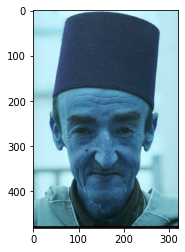

In [ ]:
BGR_img = cv2.imread(img_src)
print("BGR Result")
plt.imshow(BGR_img)
plt.show()

RGB Result


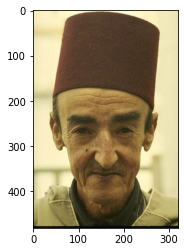

In [ ]:
RGB_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2RGB)
print("RGB Result")
plt.imshow(np.array(RGB_img))
plt.show()

**Converting BGR to gray scale**

Grayscale Image


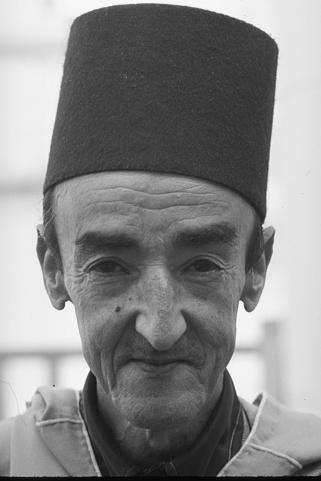

In [ ]:
gray_img = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)

print("Grayscale Image")
cv2_imshow(gray_img)

**Using median filter for noise reduction**

Grayscale Filtered Image


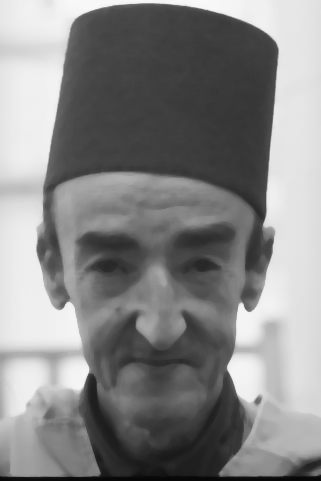

In [ ]:
smoothed_gray = cv2.medianBlur(gray_img, 7)
print("Grayscale Filtered Image")
cv2_imshow(smoothed_gray)

**Edge Detection Using Laplacian Filter**

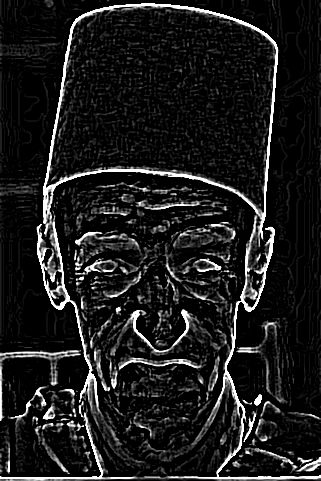

In [ ]:
ddepth = cv2.CV_8U
edge_detected_img = cv2.Laplacian(src=smoothed_gray, ddepth=ddepth, ksize=5)
cv2_imshow(edge_detected_img)

**Edges Thresholding**

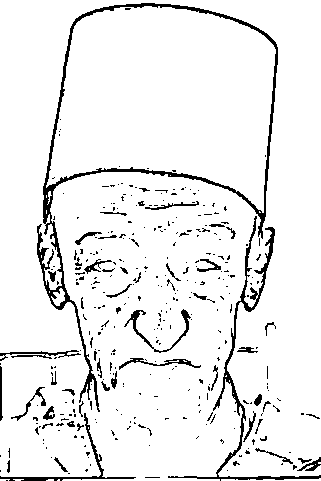

In [ ]:
threshold_value = 130

ret,mask = cv2.threshold(edge_detected_img,threshold_value,255,cv2.THRESH_BINARY_INV)
cv2_imshow(mask)

**Applying Bilateral Filter**

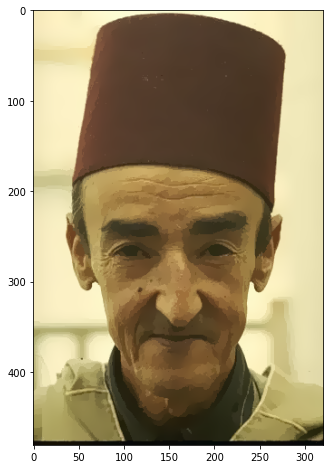

In [ ]:
iterations = 7
bilateral_img=cv2.bilateralFilter(RGB_img,9,9,7)

for i in range(iterations):
    bilateral_img = cv2.bilateralFilter(bilateral_img, 9, 9,7)

plt.figure(figsize=(20,8))
plt.imshow(bilateral_img)

**Creating Cartoon Effect**

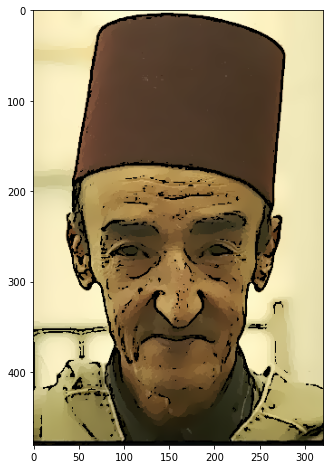

In [ ]:
cartoon = cv2.bitwise_and(bilateral_img,cv2.cvtColor(mask,cv2.COLOR_GRAY2RGB))
plt.figure(figsize=(20,8))
plt.imshow(cartoon)

## **Part 2**

In [ ]:
# Importing libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
from numpy import unravel_index
from google.colab.patches import cv2_imshow
from scipy.ndimage.filters import maximum_filter
from skimage.feature import peak_local_max
%matplotlib inline

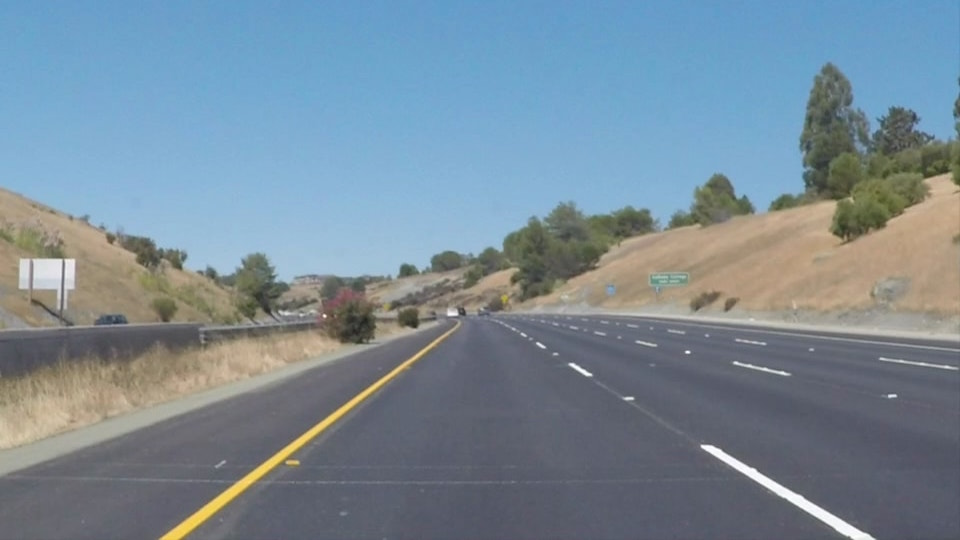

In [ ]:
# Reading the image
img = cv2.imread('/content/solidYellowCurve2.jpg')
cv2_imshow(img)

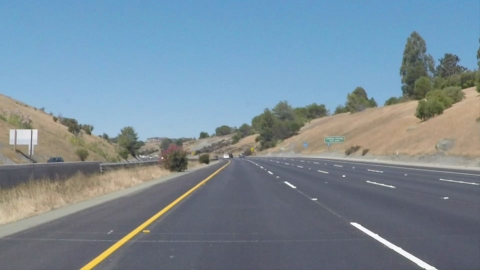

In [ ]:
# Resizing the image to half of its size
resized_img = cv2.resize(img, (int(img.shape[1]/2), int(img.shape[0]/2)))
cv2_imshow(resized_img)

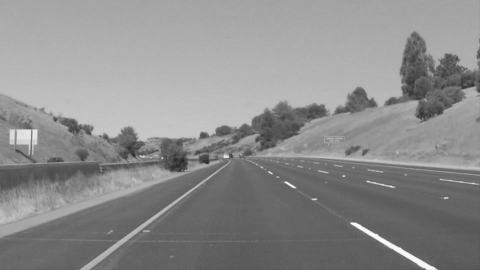

In [ ]:
# Changing it to gray 
gray_img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray_img)

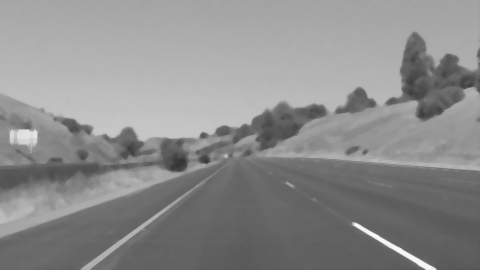

In [ ]:
# Smoothing the image with median blur filter
smoothed_img = cv2.medianBlur(gray_img, 5)
cv2_imshow(smoothed_img)

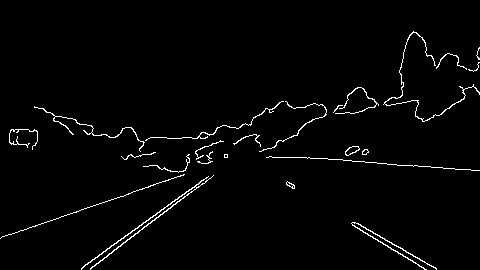

In [ ]:
# Edge detection using Canny's algorithm
canny_img = cv2.Canny(smoothed_img, 120, 240)
cv2_imshow(canny_img)

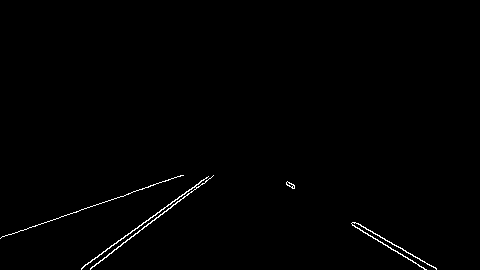

In [ ]:
# Filtering only to ROI (region of interest)
height = 95 # From bottom to up
points = np.array(
  [[0, canny_img.shape[0]], [canny_img.shape[1], canny_img.shape[0]], 
   [canny_img.shape[1], canny_img.shape[0]-height], [0, canny_img.shape[0]-height]
])
mask = np.zeros_like(canny_img)   
cv2.fillPoly(mask, [points], 255)
masked_image = cv2.bitwise_and(canny_img, mask)
cv2_imshow(masked_image)

In [ ]:
# Calculating the diagonal
h, w = masked_image.shape
d= np.round(np.sqrt(h**2 + w**2)).astype('int32')
print(f'Image shape : {masked_image.shape}\nDiagonal size : {d}')

Image shape : (270, 480)
Diagonal size : 551


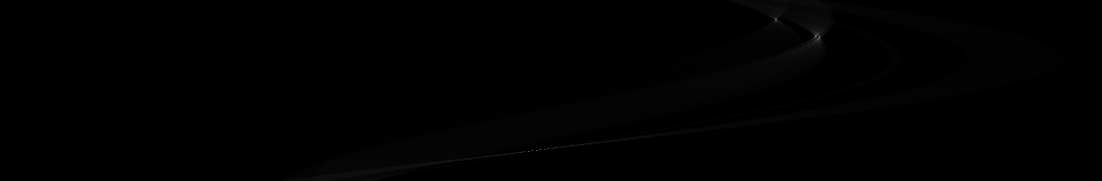

In [ ]:
# Creating Hough space
theta_size = 180
rho_size = d
H = np.zeros((theta_size+1, rho_size*2), dtype=np.uint32)
for x, y in np.ndindex(masked_image.shape):
    for theta in range(0, 180+1) :
        if masked_image[x][y] == 255 :
          sin_theta = np.sin(np.deg2rad(theta))
          cos_theta = np.cos(np.deg2rad(theta))
          rho = int (d + np.round(x * cos_theta + y * sin_theta))
          H[theta][rho] += 1
cv2_imshow(H)

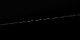

In [ ]:
# Lines with high number of votes
cv2_imshow(H[130:170, 500:580])
print()
cv2_imshow(H[5:30, 750:800])
print()
cv2_imshow(H[25:50, 800:830])

In [ ]:
# Applying peak local max for threshholding
peak_local_max(H, 85, exclude_border=False)

array([[ 37, 819],
       [150, 536],
       [ 15, 921]])

The above cell returns the thetas and rhos which forms the three lines with the highest votes. However since the second and third points of intersts are near in the Hough space. The peak_local filter with big size of 85 takes the max of the two when it is applied. So we had to find the paramters for the second point independently in the next cell.

In [ ]:
# Special handling for the second point of interst
peak_local_max(H[5:30, 750:800], 100, exclude_border=False)

array([[14, 25]])

We will add 5 in theta and 750 in rho because of the shifting done.

I've computed two points for each of these three lines manually (by hand) to get the following points:

* Line1 [yellow line] :  (Theta = 37, Rho = 268)
      Point 1 = (87, 270)
      Point 2 = (233, 160)
* Line2 [white line on the right] : (Theta = 150, Rho = -15)
      Point 1 = (438, 270)
      Point 2 = (247, 160)
* Line3 [white line on the left] : (Theta = 19, Rho = 224)
      Point 1 = (0, 237)
      Point 2 = (210, 165)

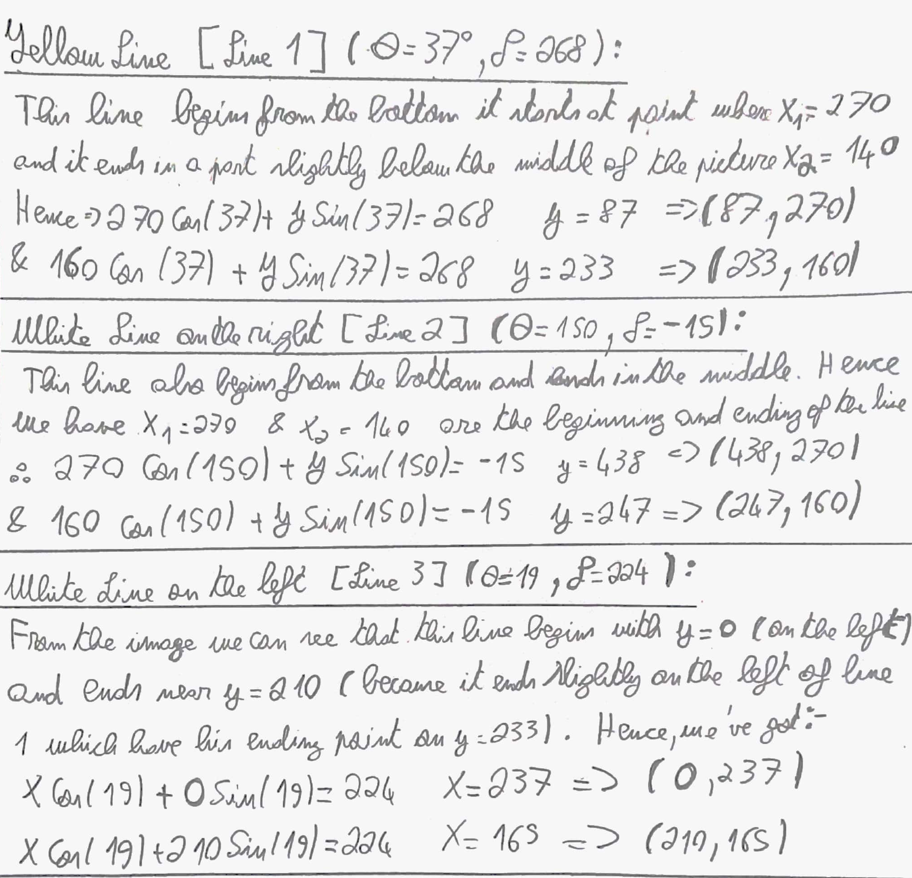

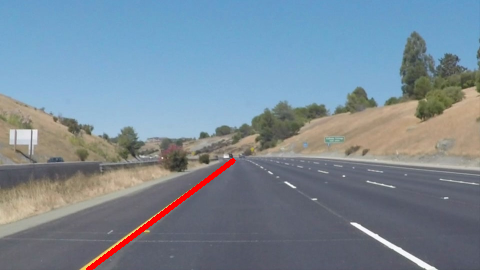

In [ ]:
# Visualizing line 1
line_1_img = resized_img.copy()
cv2.line(line_1_img,(87, 270), (233, 160), (0,0,255),3)
cv2_imshow(line_1_img)

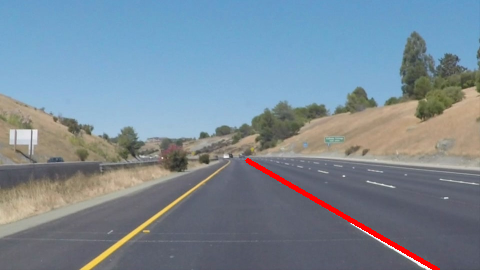

In [ ]:
# Visualizing line 2
line_2_img = resized_img.copy()
cv2.line(line_2_img,(438, 270), (247, 160), (0,0,255),3)
cv2_imshow(line_2_img)

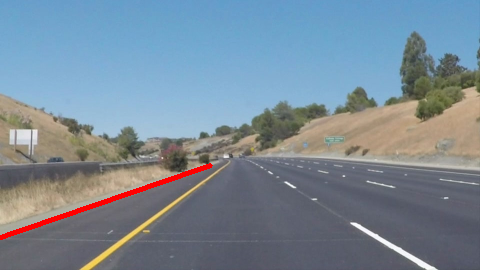

In [ ]:
# Visualizing line 3
line_3_img = resized_img.copy()
cv2.line(line_3_img,(0, 237), (210, 165), (0,0,255),3)
cv2_imshow(line_3_img)

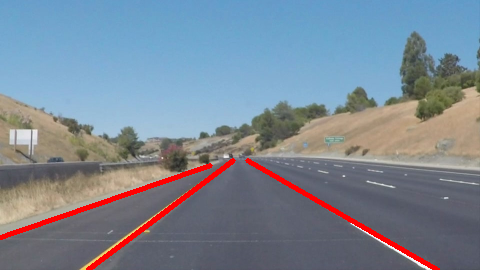

In [ ]:
# Visualizing all together
final_img = resized_img.copy()
cv2.line(final_img, (87, 270), (233, 160), (0,0,255), 3)
cv2.line(final_img, (438, 270), (247, 160), (0,0,255), 3)
cv2.line(final_img,(0, 237), (210, 165), (0,0,255),3)
cv2_imshow(final_img)

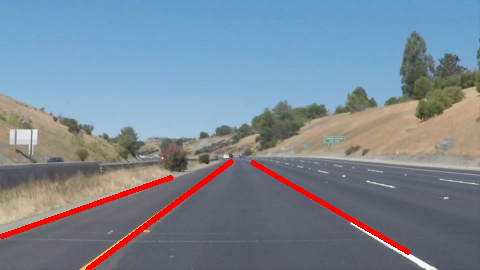

In [ ]:
# Another automated way to draw the lines
parameters = [(np.deg2rad(37),268), (np.deg2rad(150),-15), (np.deg2rad(19), 224)]
final_img_2 = resized_img.copy()
for theta,rho in parameters:
  # Computing cosine and sin theta
  a = np.cos(-theta) 
  b = np.sin(-theta) 
  points = []
  for k in range(-w, w):
      x1 = int(a * k - b * rho)
      y1 = int(b * k + a * rho)
      if x1> 0 and y1>0 and x1 < w and y1<h:
        points.append((x1,y1))
  cv2.line(final_img_2,points[0], points[180], (0,0,255), 3)
cv2_imshow(final_img_2)

####Draft 1


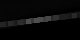

array([[[   0, 1072, -618,    0]]])

In [ ]:
hough_1 = threshholded_img[130:170, 500:580]
theta = 130 + int(np.median(np.where(hough_1 == np.max(hough_1))[0]))
rho =  500 + int(np.median(np.where(hough_1 == np.max(hough_1))[1]))
line_1 = np.array([[(0,int(rho/np.sin(np.deg2rad(theta))), int(rho/np.cos(np.deg2rad(theta))), 0)]])
cv2_imshow(hough_1)
line_1

In [ ]:
hough_2 = threshholded_img[5:30, 750:800]
theta = 5 + int(np.median(np.where(hough_2 == np.max(hough_2))[0]))
rho =  750 + int(np.median(np.where(hough_2 == np.max(hough_2))[1]))
line_2 = np.array([[(0,int(rho/np.sin(np.deg2rad(theta))), int(rho/np.cos(np.deg2rad(theta))), 0)]])
cv2_imshow(hough_2)
line_2

array([[[   0, 2380,  819,    0]]])

In [ ]:
hough_3 = threshholded_img[25:50, 800:830]
theta = 25 + int(np.median(np.where(hough_3 == np.max(hough_3))[0]))
rho =  800 + int(np.median(np.where(hough_3 == np.max(hough_3))[1]))
line_3 = np.array([[(0,int(rho/np.sin(np.deg2rad(theta))), int(rho/np.cos(np.deg2rad(theta))), 0)]])
cv2_imshow(hough_3)
line_3

array([[[   0, 1360, 1025,    0]]])

#### Draft 2

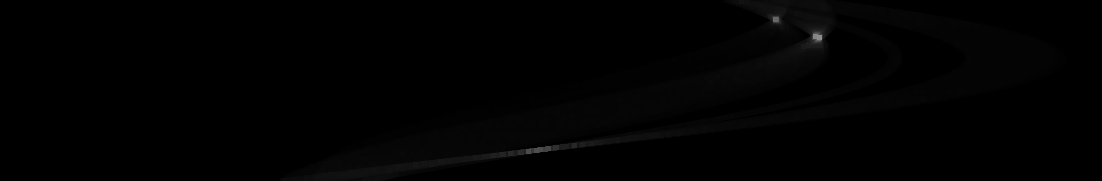

In [ ]:
threshholded_img = maximum_filter(H,(5,5))
cv2_imshow(threshholded_img)

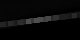

In [ ]:
# Lines with high number of votes
cv2_imshow(threshholded_img[130:170, 500:580])
print()
cv2_imshow(threshholded_img[5:30, 750:800])
print()
cv2_imshow(threshholded_img[25:50, 800:830])

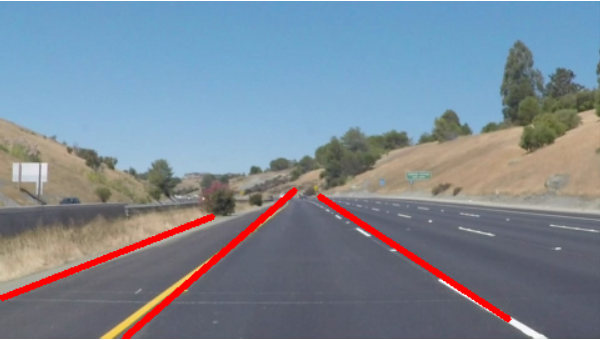